In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = [15, 5]

In [2]:
# Changer le chemin pointant vers le dossier dans lequel sont chargées les données

DATA_PATH = '/home/benoit/data/projet_deep_learning_cs'

In [3]:
from helpers import loadOwid


test_length = 20
load_window = (0, 410)


pop_it = 60.36
pop_uk = 66.65

In [4]:
from helpers import processData, splitTrainTest

pop = pop_it

# True donnée prédite
# False donnée externe
data_description = {
    'new_deaths':True,
    'icu_patients':True,
    'stringency_index':False,
    'hosp_patients':True
}

d = loadOwid(DATA_PATH, "Italy", data_description, window=load_window)

d['new_deaths'] = processData(d['new_deaths'], div=pop*13, average=True)
d['icu_patients'] = processData(d['icu_patients'], div=pop*100, offset=7)
d['stringency_index'] = processData(d['stringency_index'], div=100, offset=7)
d['hosp_patients'] = processData(d['hosp_patients'], div=pop*510, offset=7)

d_italy = d

d_italy_train, d_italy_test = splitTrainTest(d, test_length)

In [5]:
pop = pop_uk

# True donnée prédite
# False donnée externe
data_description = {
    'new_deaths':True,
    'icu_patients':True,
    'stringency_index':False,
    'hosp_patients':True
}

d = loadOwid(DATA_PATH, "United Kingdom", data_description, window=load_window)

d['new_deaths'] = processData(d['new_deaths'], div=pop*13, average=True)
d['icu_patients'] = processData(d['icu_patients'], div=pop*100, offset=7)
d['stringency_index'] = processData(d['stringency_index'], div=100, offset=7)
d['hosp_patients'] = processData(d['hosp_patients'], div=pop*510, offset=7)

d_uk = d

d_uk_train, d_uk_test = splitTrainTest(d, test_length)

In [6]:
pop = 67

# True donnée prédite
# False donnée externe
data_description = {
    'new_deaths':True,
    'icu_patients':True,
    'stringency_index':False,
    'hosp_patients':True
}

d = loadOwid(DATA_PATH, "France", data_description, window=load_window)

d['new_deaths'] = processData(d['new_deaths'], div=pop*13, average=True)
d['icu_patients'] = processData(d['icu_patients'], div=pop*100, offset=7)
d['stringency_index'] = processData(d['stringency_index'], div=100, offset=7)
d['hosp_patients'] = processData(d['hosp_patients'], div=pop*510, offset=7)

d_france = d

d_france_train, d_france_test = splitTrainTest(d, test_length)

In [7]:
pop = 83

# True donnée prédite
# False donnée externe
data_description = {
    'new_deaths':True,
    'icu_patients':True,
    'stringency_index':False,
    'hosp_patients':True
}

d = loadOwid(DATA_PATH, "Germany", data_description, window=load_window)

d['new_deaths'] = processData(d['new_deaths'], div=pop*13, average=True)
d['icu_patients'] = processData(d['icu_patients'], div=pop*100, offset=7)
d['stringency_index'] = processData(d['stringency_index'], div=100, offset=7)
d['hosp_patients'] = processData(d['hosp_patients'], div=pop*510, offset=7)

d_germany = d

d_germany_train, d_germany_test = splitTrainTest(d, test_length)

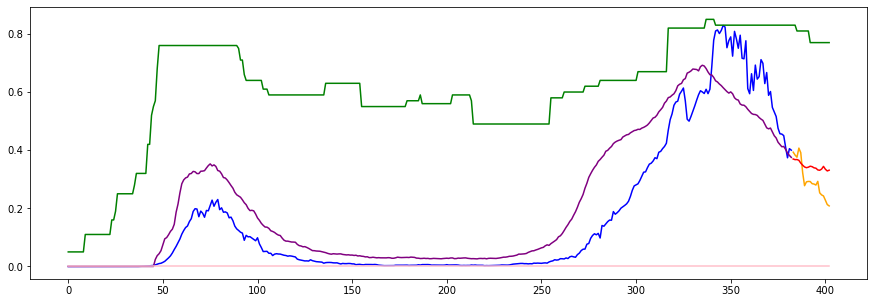

In [8]:
from matplotlib.pyplot import plot

dd = d_germany
dd_train = d_germany_train
dd_test = d_germany_test

train_length = len(dd_train[list(d.keys())[0]])

train_index = [i for i in range(train_length)]
test_index = [i+train_length for i in range(test_length)]

plot(train_index, dd_train['new_deaths'], color="b")
plot(test_index, dd_test['new_deaths'], color ="orange")
plot(train_index, dd_train['icu_patients'], color="purple")
plot(test_index, dd_test['icu_patients'], color ="red")
plot(dd['stringency_index'], color ="green")
plot(dd['hosp_patients'], color ="pink")

In [9]:
from helpers import formatData

step = 5
# add step elements into train and test

trainX, trainY = formatData([d_italy_train, d_uk_train, d_france_train, d_germany_train], step, data_description)

trainX.shape

(1512, 5, 4)

In [24]:
from helpers import loadModel

dim = (len(dd_train.keys()), sum(list(data_description.values()))) # On calcule les dimensions d'entrée et de sortie

model = loadModel(name="simpleRNN", dim=dim, step=step, loss="mean_squared_error")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 16)                336       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(trainX,trainY, epochs=75, batch_size=2, verbose=1)

Epoch 1/75
1512/1512 [==============================] - 8s 6ms/step - loss: 0.0135
Epoch 2/75
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0094
Epoch 3/75
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0090
Epoch 4/75
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0089
Epoch 5/75
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0089
Epoch 6/75
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0089
Epoch 7/75
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0088
Epoch 8/75
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0088
Epoch 9/75
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0088
Epoch 10/75
1512/1512 [==============================] - 7s 5ms/step - loss: 0.0088
Epoch 11/75
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0088
Epoch 12/75
1512/1512 [==============================] - 8s 5ms/step - loss: 0.0088
E

In [17]:
from helpers import makeForcedPredictions, makePredictions

dtrain = d_italy_train
dtest = d_italy_test

X, _ = formatData([dtrain], step, data_description)

train_predict = makeForcedPredictions(model, dtrain, step, data_description)


external_params = {"stringency_index": dtrain["stringency_index"][-test_length:]}
#external_params = {}
test_predict = makePredictions(model, X[-1], data_description, 20, external_params)


# freePredict = makePredictions(model, trainX[50], list(d_test.keys()), 1000)

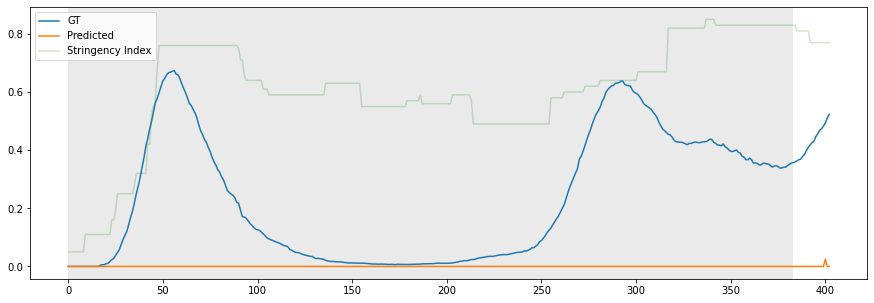

In [20]:
from matplotlib.pyplot import legend, axvspan
from numpy import concatenate
import matplotlib.pyplot as plt


dim = 'icu_patients'

gt = concatenate([dtrain[dim], dtest[dim]])
predicted = concatenate([train_predict[dim], test_predict[dim]], axis=0)

plot(gt, label='GT')
plot(predicted, label='Predicted')
plot(d['stringency_index'], color="green", alpha=0.2, label='Stringency Index')
#plot(freePredict[dim], label='freePredicted')
axvspan(load_window[1]-test_length - 7, 0, facecolor='0.2', alpha=0.1)
legend()

In [ ]:
plot(h.history['loss'][:])

In [ ]:
from keras import losses

np.sqrt(losses.MSE(testPredict, cases_test).numpy())